In [29]:
# Data preprocessing

import csv
from hypothesis_test import *
from kardis_test import *
from mg_calculator import *
from q_finder import *
from graph_distributions import *

"""----------------------------------------Process Charges Data-------------------------------------------------"""


file = open(r"Datasets/compas-scores-two-years.csv", mode='r', encoding='utf-8-sig')
csvreader = csv.reader(file)
rowlist = [row for row in csvreader]
for category in rowlist[0]:
    index = rowlist[0].index(category)
    exec(category + " = [row[index] for row in rowlist[1:]]")
file.close()

battery_ids = [int(id[x]) for x in range(len(id)) if days_b_screening_arrest[x] != '' and int(days_b_screening_arrest[x]) <= 30 and 
              int(days_b_screening_arrest[x]) >= -30 and int(is_recid[x]) != -1 and
              c_charge_desc[x] == 'Battery' and score_text[x] != 'N/A']


idx = 0
battery_scores = []
for x in range(len(id)):
    if idx < len(battery_ids):
        if int(id[x]) == battery_ids[idx]:
            battery_scores.append(score_text[x])
            idx += 1
    else:
        break

idx = 0
battery_races = []
for x in range(len(id)):
    if idx < len(battery_ids):
        if int(id[x]) == battery_ids[idx]:
            battery_races.append(race[x])
            idx += 1
    else:
        break
        

possession_ids = [int(id[x]) for x in range(len(id)) if days_b_screening_arrest[x] != '' and int(days_b_screening_arrest[x]) <= 30 and 
              int(days_b_screening_arrest[x]) >= -30 and int(is_recid[x]) != -1 and
                ('Possession' in c_charge_desc[x]) and 
                  (not "Aggravated" in c_charge_desc[x]) and score_text[x] != 'N/A']



idx = 0
possession_scores = []
for x in range(len(id)):
    if idx < len(possession_ids):
        if int(id[x]) == possession_ids[idx]:
            possession_scores.append(score_text[x])
            idx += 1
    else:
        break


idx = 0
possession_races = []
for x in range(len(id)):
    if idx < len(possession_ids):
        if int(id[x]) == possession_ids[idx]:
            possession_races.append(race[x])
            idx += 1
    else:
        break



Null hypothesis (proposed distribution): [0.06172839506172839, 0.18271604938271604, 0.7555555555555555]

Proposed distribution rejected at alpha = 0.05. Kardis = 3.22373190379543e-17.
Any plausible distribution must boost probability over the given distribution by 1.55099746170372e+15, and will therefore have a minimum probability of 3.91335298588506e-8.
Closest plausible distribution: [0.10675974551133179, 0.22385517617344028, 0.6693850783152279]


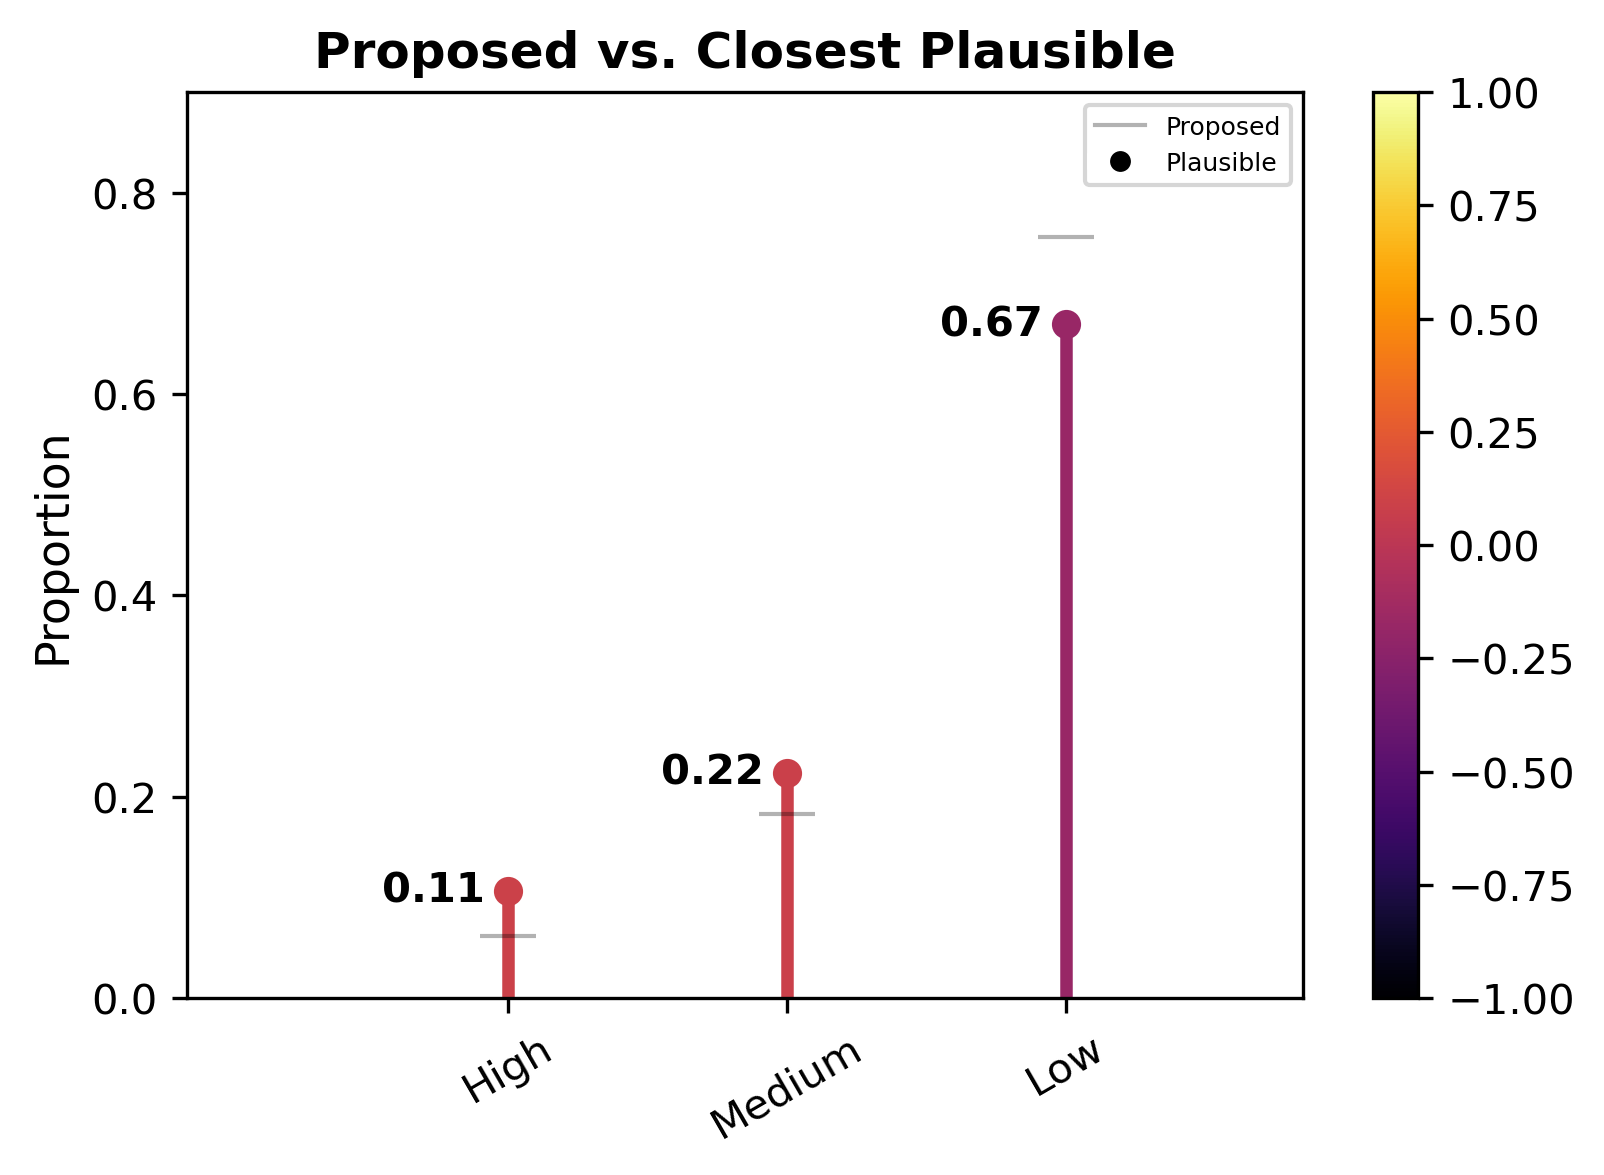

<Figure size 432x288 with 0 Axes>

In [30]:
# Battery Test
recid_races_and_scores = list(filter(lambda x: not x[1] == 'N/A', list(zip(battery_races,battery_scores))))
white_count = len(list(filter(lambda x: x[0] == 'Caucasian', recid_races_and_scores)))
white_props = [recid_races_and_scores.count(('Caucasian','High'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Medium'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Low'))/white_count]

AA_scores = list(filter(lambda x: x[0] == 'African-American', recid_races_and_scores))

print("Null hypothesis (proposed distribution): " + str(white_props) + "\n")

q_white_props = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')],\
                alpha = 0.05, hypothesis = white_props)[4]

graph_distributions(q_white_props,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=white_props, filename=r"Results/compas_AA_battery_white_dist.pdf")

Null hypothesis (proposed distribution): [0.14432989690721648, 0.2646048109965636, 0.5910652920962199]

Proposed distribution rejected at alpha = 0.05. Kardis = 2.71226242235759e-28.
Any plausible distribution must boost probability over the given distribution by 1.8434794357597e+26, and will therefore have a minimum probability of 1.15628274515357e-7.
Closest plausible distribution: [0.2819739613273516, 0.2950876593244372, 0.4229383793482113]


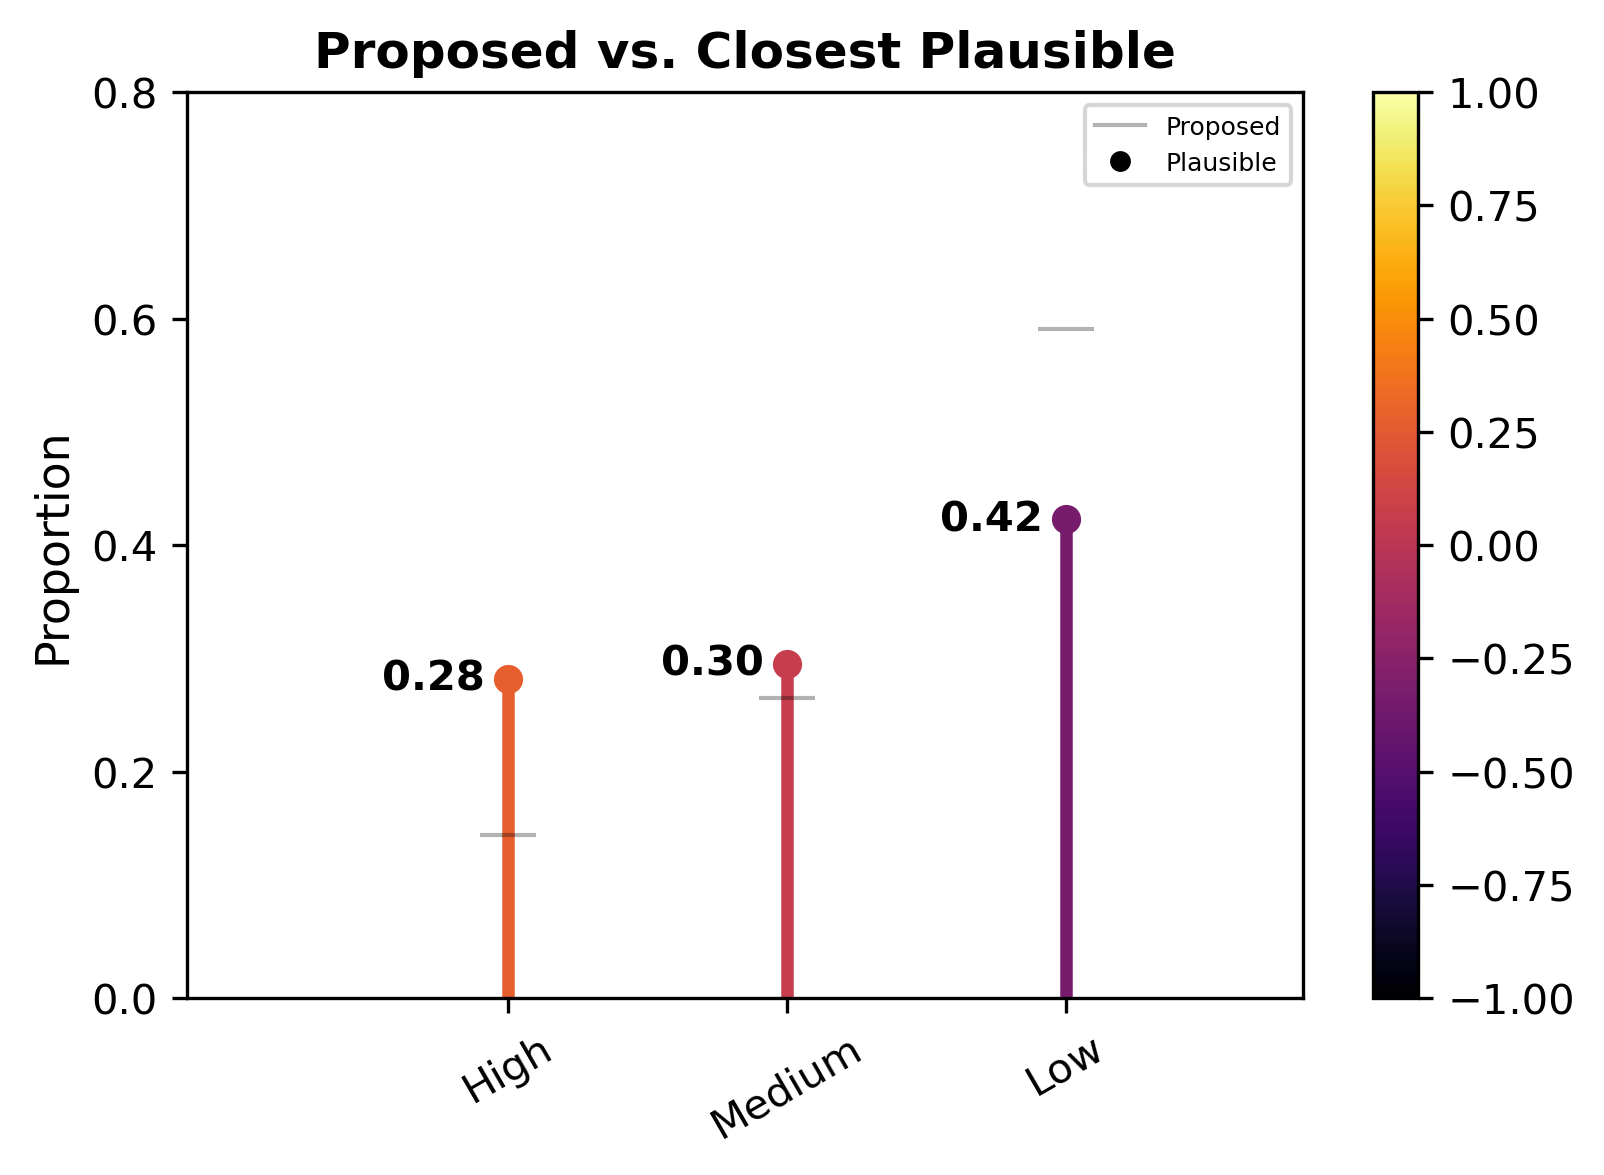

<Figure size 432x288 with 0 Axes>

In [31]:
#Possession Test
recid_races_and_scores = list(filter(lambda x: not x[1] == 'N/A', list(zip(possession_races,possession_scores))))
white_count = len(list(filter(lambda x: x[0] == 'Caucasian', recid_races_and_scores)))
white_props = [recid_races_and_scores.count(('Caucasian','High'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Medium'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Low'))/white_count]
AA_scores = list(filter(lambda x: x[0] == 'African-American', recid_races_and_scores))

print("Null hypothesis (proposed distribution): " + str(white_props) + "\n")

q_white_props = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')],\
                alpha = 0.05, hypothesis = white_props)[4]

graph_distributions(q_white_props,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=white_props, filename=r"Results/compas_AA_possession_white_dist.pdf")